In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pip install simplejson

Note: you may need to restart the kernel to use updated packages.


In [4]:
import gzip     #compress the file
import simplejson   #json files functions

In [5]:
def parse(filename):
    f = gzip.open(filename, 'r')
    entry = {}
    for l in f:
        l = l.strip()
        l = l.decode()
        colonPos = l.find(':')
        if colonPos == -1:
            yield entry
            entry = {}
            continue
        eName = l[:colonPos]
        rest = l[colonPos+2:]
        entry[eName] = rest
    yield entry
def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

Online E-commerce websites like Amazon, Flipkart uses different recommendation models to provide different suggestions to different users. Amazon currently uses item-to-item collaborative filtering, which scales to massive data sets and produces high-quality recommendations in real-time.

Dataset:<br>
- In our recommendation model, we use Electronics, Shoes, Cellphones, Sports and Watches Dataset

Objective of the project:<br>
- Build a recommendation system to recommend products to customers based on the their previous ratings for other products.
- Make a Collaborative filtering model that recommends top 10 products for each user
- Make Popularity based recommender provide a general count of recommended products to all the users. They are not sensitive to the interests and tastes of a particular user.

- product/productId: it gives the productid of the product in each category
- product/title: this attribute gives the title of the product in the category
- product/price: gives the price of the product 
- review/userId: the userid of the user who bought the corresponding product
- review/profileName: profile name of the user account
- review/helpfulness: people's rating if the product was useful in the proportion
- review/score: rating given by the user to the corresponding product
- review/time: The time when the user gave the review to the product bought
- review/summary: just a summary of the product
- review/text: the whole text given by the user to the corresponding produc

## Electronics Dataset

In [6]:
elec = getDF('Electronics.txt.gz')
elec.head()

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,B0000630MQ,Kodak Max K2000 Battery Charger with 4 NiMH AA...,unknown,A2F6FARSB1VL6Q,"""frumpy16""",2/2,5.0,1072915200,Great charger,I recently bought this charger kit from Amazon...
1,B0000630MQ,Kodak Max K2000 Battery Charger with 4 NiMH AA...,unknown,unknown,unknown,2/2,5.0,1058745600,Super product! I'm very happy.,"The batteries are excellent (1850's), and the ..."
2,B0000630MQ,Kodak Max K2000 Battery Charger with 4 NiMH AA...,unknown,A3P56Q3XEGTBNY,Yisheng Zhang,1/1,2.0,1127088000,Problem with charging smaller AAAs,I have had the charger for more than two years...
3,B0000630MQ,Kodak Max K2000 Battery Charger with 4 NiMH AA...,unknown,unknown,unknown,3/4,5.0,1068768000,CHECK OUT THE K6000 CHARGER!,Greetings. Kodak also has a K6000 charger whic...
4,B0000630MQ,Kodak Max K2000 Battery Charger with 4 NiMH AA...,unknown,AZIM9ZTGB8Q12,G. Evans,0/0,5.0,1274313600,Finally a Great recharger with batteries!,I have used and recharged my batteries nearly ...


In [7]:
elec.shape

(1241778, 10)

In [8]:
elec.describe()

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
count,1241778,1241778,1241778,1241778,1241778,1241778,1241778,1241778,1241778,1241778
unique,82067,80818,7614,811034,678486,6528,5,5152,823750,1170440
top,B0002L5R78,DVI Gear HDMI Cable 2M 6 feet,unknown,unknown,unknown,0/0,5.0,1168300800,Great Product,Needed to attach a few more devices thru an 8-...
freq,7588,7588,643429,52227,52229,474738,641214,6810,3723,289


In [9]:
elec.dtypes

product/productId     object
product/title         object
product/price         object
review/userId         object
review/profileName    object
review/helpfulness    object
review/score          object
review/time           object
review/summary        object
review/text           object
dtype: object

In [10]:
elec.isnull().any()

product/productId     False
product/title         False
product/price         False
review/userId         False
review/profileName    False
review/helpfulness    False
review/score          False
review/time           False
review/summary        False
review/text           False
dtype: bool

In [11]:
elec.isnull().sum()

product/productId     0
product/title         0
product/price         0
review/userId         0
review/profileName    0
review/helpfulness    0
review/score          0
review/time           0
review/summary        0
review/text           0
dtype: int64

In [12]:
elec.drop_duplicates(keep=False,inplace=True)

In [13]:
elec.shape

(1239319, 10)

In [14]:
# lets make a copy of the data so that all the transformation is done on the copy and not on the main dataset
t1data=elec.copy()

In [15]:
np.sort(t1data['review/score'].unique())
# ie, The ratings are in range of 1-5

array(['1.0', '2.0', '3.0', '4.0', '5.0'], dtype=object)

In [16]:
t1data=t1data[t1data['product/price'] !='unknown']

In [17]:
t1data['product/price'] = pd.to_numeric(t1data['product/price'])
t1data['product/price'].value_counts()

3.98      7689
9.99      7200
19.99     6838
18.95     6426
39.99     6396
          ... 
161.77       1
95.81        1
103.27       1
65.41        1
91.24        1
Name: product/price, Length: 7613, dtype: int64

In [18]:
t1data=t1data[t1data['review/userId'] !='unknown']

In [19]:
t1data['review/userId'].value_counts()

ARBKYIVNYWK3C     174
A5JLAU2ARJ0BO     104
A3OXHLG6DIBRW8    102
A203OCQQ12MAVT     97
A6FIAB28IS79       92
                 ... 
ACKDGXC6LI5S4       1
APB2HPNA48ND7       1
AE37UDJGDOVOI       1
A1PUWEBCSVMCNN      1
A47U21IEIJNM2       1
Name: review/userId, Length: 449515, dtype: int64

In [20]:
t1data['review/score'] = pd.to_numeric(t1data['review/score'])
t1data['review/score'].value_counts()

5.0    327064
4.0    111695
1.0     71952
3.0     45060
2.0     33352
Name: review/score, dtype: int64

In [21]:
contractions={
    "ain't": "are not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how're": "how are",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you shall have",
    "you're": "you are",
    "you've": "you have",
    "doin'": "doing",
    "goin'": "going",
    "nothin'": "nothing",
    "somethin'": "something",
}

In [22]:
def cont_to_exp(x):
    if type(x) is str:
        x = x.replace('\\','')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [23]:
t1data["review/text"] = t1data["review/text"].apply(lambda x:cont_to_exp(x))
t1data["review/summary"] = t1data["review/summary"].apply(lambda x:cont_to_exp(x))
t1data.head()

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
85,B000P9JTW6,Gomadic Compact Retractable USB Charge and Dat...,17.69,A2T7YFEAI0X74W,Thomas O. Fort,0/0,4.0,1245974400,nifty,It is very convenient to have the charging cab...
86,B0000DFZ2U,APC P1T 120V Portable Surge Protector,13.89,A1Y8DLP78Z778V,Michael,1/1,5.0,1287273600,APC P1T 120V Portable Surge Protector,Perfect carry-along for my notebook PC. Useful...
87,B0000DFZ2U,APC P1T 120V Portable Surge Protector,13.89,AAF3I3SZ6CXGY,"Ross Knight ""Subvet""",0/0,5.0,1360108800,Insurance policy!,This protector is an excellent value. Rated ve...
88,B0000DFZ2U,APC P1T 120V Portable Surge Protector,13.89,ARA1MZKJQLXGE,Kevin,0/0,5.0,1359244800,Works great for appliances,I bought one of these to protect my washing ma...
89,B0000DFZ2U,APC P1T 120V Portable Surge Protector,13.89,A2P9Q94AA63517,Bruce E Harrison,0/0,5.0,1355270400,Single Surge Protector,Just right for travel for my computer and it i...


In [24]:
t1data.describe()

,product/price,review/score
count,589123.000000,589123.000000
mean,65.739503,3.999056
std,114.197595,1.399042
min,0.010000,1.000000
25%,10.950000,3.000000
50%,25.950000,5.000000
75%,64.990000,5.000000
max,999.990000,5.000000


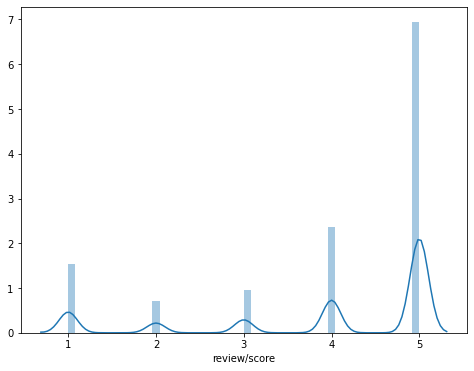

In [25]:
plt.figure(figsize=(8,6))
sns.distplot(t1data['review/score']);

In [26]:
t1data

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
85,B000P9JTW6,Gomadic Compact Retractable USB Charge and Dat...,17.69,A2T7YFEAI0X74W,Thomas O. Fort,0/0,4.0,1245974400,nifty,It is very convenient to have the charging cab...
86,B0000DFZ2U,APC P1T 120V Portable Surge Protector,13.89,A1Y8DLP78Z778V,Michael,1/1,5.0,1287273600,APC P1T 120V Portable Surge Protector,Perfect carry-along for my notebook PC. Useful...
87,B0000DFZ2U,APC P1T 120V Portable Surge Protector,13.89,AAF3I3SZ6CXGY,"Ross Knight ""Subvet""",0/0,5.0,1360108800,Insurance policy!,This protector is an excellent value. Rated ve...
88,B0000DFZ2U,APC P1T 120V Portable Surge Protector,13.89,ARA1MZKJQLXGE,Kevin,0/0,5.0,1359244800,Works great for appliances,I bought one of these to protect my washing ma...
89,B0000DFZ2U,APC P1T 120V Portable Surge Protector,13.89,A2P9Q94AA63517,Bruce E Harrison,0/0,5.0,1355270400,Single Surge Protector,Just right for travel for my computer and it i...
...,...,...,...,...,...,...,...,...,...,...
1241756,B000DZAKSE,"Replacement Battery for Sony Clie PEG-TJ27, PE...",14.95,A2U3ZAW99J261,"K. L. Sinclair ""Snowrider81""",1/1,4.0,1274227200,Fits fine - not high capacity,This fit perfectly into my Clie. The one i pur...
1241757,B000DZAKSE,"Replacement Battery for Sony Clie PEG-TJ27, PE...",14.95,A2B6EAS63JQLKQ,Wagonmaster,1/1,5.0,1231632000,Received promptly and as advertized,The battery pack was shipped promptly and was ...
1241758,B000DZAKSE,"Replacement Battery for Sony Clie PEG-TJ27, PE...",14.95,A1UUPAS95JCE5T,Gwenita Rock,0/0,4.0,1251590400,palm pilot replacement battery,It's great to have my palm pilot up and runnin...
1241776,B000063W56,Sony ACCCSP Starter Kit for DSCP3 & DSCP5 Digi...,99.20,AA2CXRGE0GN1S,"Y. Hu ""Y""",1/1,5.0,1024963200,"Case, Battery and 32 Meg Memory Stick",I bought this item because I thought there was...


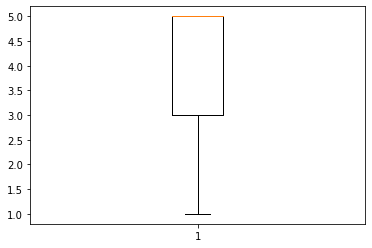

In [27]:
plt.boxplot(t1data['review/score']);

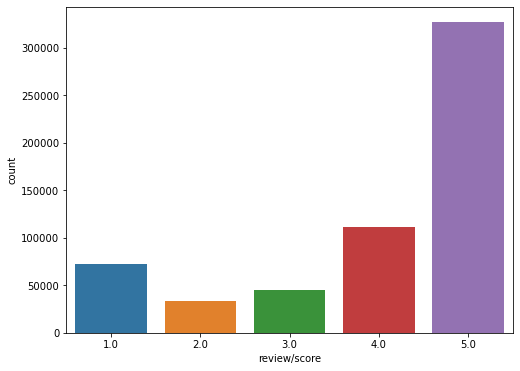

In [28]:
plt.figure(figsize=(8,6))
sns.countplot(t1data['review/score']);

## Shoes Dataset

In [29]:
shoes = getDF('Shoes.txt.gz')
shoes.head()

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,B0009PK7KO,"Caligarius Women's Acheta Pump,Black Calf,6 M",unknown,A12O8IHB65BC1S,Fifi,2/2,4.0,1169769600,Beautiful basic pump...,... but not enough sizes or colors. Fits true ...
1,B0007MCVQ2,"Clarks Men's Charter Slip-On, Brown Oily Leath...",unknown,A3363OQWT5L3FT,"Marilyn M. Turner ""whitbrook""",0/0,2.0,1168387200,Didn't live up to expectations.,I ordered these shoes to replace the previous ...
2,B0007MCVQ2,"Clarks Men's Charter Slip-On, Brown Oily Leath...",unknown,A1BHUGKLYW6H7V,P. Lecuyer,0/0,5.0,1127088000,Love my Clarks!,"Like all Clarks, these guys didn't disappoint...."
3,B0002M1FPK,"Lightweight Slides, Champagne, 8.5 W",unknown,AITX28WR0L5Y6,"Carol Popick ""Chet""",0/0,5.0,1245715200,ANNIE PEANUT,i HAVE PURCHASED ANNIE PEANUT BEFORE AND THEY ...
4,B0002M1FPK,"Lightweight Slides, Champagne, 8.5 W",unknown,A1ZPFKIGT4I69S,"KJ Brassy ""KJ Brassy""",0/0,5.0,1168300800,Annie Peanut Shoes,These are my favorite shoes of all time. I fir...


In [30]:
shoes.shape

(389877, 10)

In [31]:
shoes.describe()

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
count,389877,389877,389877,389877,389877,389877,389877,389877,389877,389877
unique,48410,34364,402,73590,66547,530,5,3251,57618,80328
top,B0002M7SPG,Converse Mens Chuck Taylor Sneaker,unknown,unknown,unknown,0/0,5.0,1168300800,Great shoe,Dada's are some of the best basketball shoes i...
freq,886,24193,377938,4369,4369,233004,256503,2803,1978,575


In [32]:
shoes.dtypes

product/productId     object
product/title         object
product/price         object
review/userId         object
review/profileName    object
review/helpfulness    object
review/score          object
review/time           object
review/summary        object
review/text           object
dtype: object

In [33]:
shoes.isnull().any()

product/productId     False
product/title         False
product/price         False
review/userId         False
review/profileName    False
review/helpfulness    False
review/score          False
review/time           False
review/summary        False
review/text           False
dtype: bool

In [34]:
shoes.isnull().sum()

product/productId     0
product/title         0
product/price         0
review/userId         0
review/profileName    0
review/helpfulness    0
review/score          0
review/time           0
review/summary        0
review/text           0
dtype: int64

In [35]:
shoes.drop_duplicates(keep=False,inplace=True)

In [36]:
shoes.shape

(389533, 10)

In [37]:
# lets make a copy of the data so that all the transformation is done on the copy and not on the main dataset
t2data=shoes.copy()

In [38]:
np.sort(t2data['review/score'].unique())
# ie, The ratings are in range of 1-5

array(['1.0', '2.0', '3.0', '4.0', '5.0'], dtype=object)

In [39]:
t2data=t2data[t2data['product/price'] !='unknown']

In [40]:
t2data['product/price'] = pd.to_numeric(t2data['product/price'])
t2data['product/price'].value_counts()

34.99    540
34.07    538
33.95    534
41.95    494
4.99     424
        ... 
68.95      1
2.35       1
55.75      1
78.47      1
9.44       1
Name: product/price, Length: 401, dtype: int64

In [41]:
t2data=t2data[t2data['review/userId'] !='unknown']

In [42]:
t2data['review/userId'].value_counts()

A39Z78E7W44JYR    54
A2RX9RONVFN1BY    54
A23XHS4DISR8HD    54
A3VAKIYKK8SHJZ    54
A3RO48PGHI6HRT    54
                  ..
A1G8COMAXE6W0B     1
A242QVNXDX5QF7     1
A3CUJY7GTQV2B9     1
A29OUIQU1W4V9T     1
A2FA57CIBSD4FI     1
Name: review/userId, Length: 4760, dtype: int64

In [43]:
t2data['review/score'] = pd.to_numeric(t2data['review/score'])
t2data['review/score'].value_counts()

5.0    7559
4.0    2060
3.0     889
1.0     819
2.0     588
Name: review/score, dtype: int64

In [44]:
t2data["review/text"] = t2data["review/text"].apply(lambda x:cont_to_exp(x))
t2data["review/summary"] = t2data["review/summary"].apply(lambda x:cont_to_exp(x))
t2data.head()

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
2711,B000BQR55G,Shoe Goo,5.75,AXF3ZAXUGOEON,snowleopard,2/2,4.0,1273449600,Works Very Well,I have used Shoe Goo for years on many pairs o...
2712,B000BQR55G,Shoe Goo,5.75,A3AVTFW8WIMLET,"Muriel Rakotomahanina ""Muriel R""",2/2,4.0,1260921600,Works but messy!,"Bonds sole of shoes well, but it was difficult..."
2713,B000BQR55G,Shoe Goo,5.75,A3HPLYO15TGJZ8,P. Wing,2/2,5.0,1256342400,Shoe Goo is a time and money saver.,I have been using Shoe Goo for years to extend...
2714,B000BQR55G,Shoe Goo,5.75,AM4YGBWX05RHT,james NY,2/2,5.0,1253232000,Great for other uses too!,I have a convertable top on my car and about t...
2715,B000BQR55G,Shoe Goo,5.75,A3EKB6TSBAEXWF,Jamerican J,2/2,5.0,1231459200,wow it really does help... alot,this stuff has really extended the life of my ...


In [45]:
t2data.describe()

,product/price,review/score
count,11915.000000,11915.000000
mean,41.975073,4.254889
std,30.977799,1.208390
min,1.090000,1.000000
25%,26.990000,4.000000
50%,38.560000,5.000000
75%,49.900000,5.000000
max,394.950000,5.000000


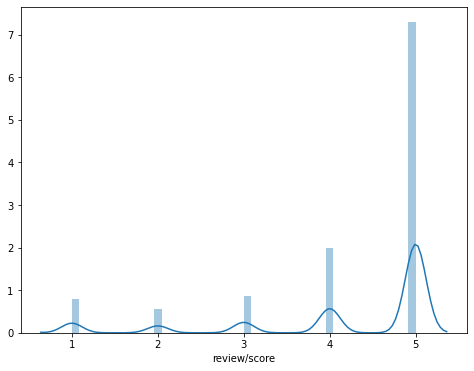

In [46]:
plt.figure(figsize=(8,6))
sns.distplot(t2data['review/score']);

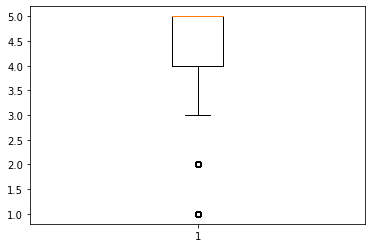

In [47]:
plt.boxplot(t2data['review/score']);

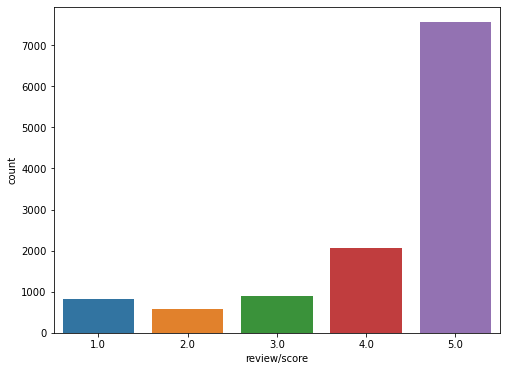

In [48]:
plt.figure(figsize=(8,6))
sns.countplot(t2data['review/score']);

## Watches Dataset

In [49]:
watch = getDF('Watches.txt.gz')
watch.head()

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,B000NLZ4A2,Casio Men's G1710D-7AV G-Shock Ana-Digi Sport ...,unknown,AEM9CCSE7CQ9M,"Charlie White ""Tech-Guy""",0/0,4.0,1260230400,"Unique G-Shock Design, same G-Shock Quality",Having owned two previous G-Shocks in my life ...
1,B000NLZ4A2,Casio Men's G1710D-7AV G-Shock Ana-Digi Sport ...,unknown,AA6ESFOYCNJKG,Marco Antonio Hernandez Lara,0/0,4.0,1216339200,Nice Watch,"Thats a good watch, light, comfortable, accura..."
2,B000NLZ4A2,Casio Men's G1710D-7AV G-Shock Ana-Digi Sport ...,unknown,A2X0RB3JKV4E7C,Mary Perez,1/2,5.0,1245024000,Is it battery powered or Solar/,I am ready to purchase this beautiful watch bu...
3,B000AIO6RA,"Seiko Men's Criteria ""Orange Bullet"" Automatic...",unknown,AIZ446JTDW9B5,Mike Robbins,3/3,5.0,1122422400,2005 Latest Seiko Diver Models,2005 Latest model from Seiko Model SKXA53K2. P...
4,B000AIO6RA,"Seiko Men's Criteria ""Orange Bullet"" Automatic...",unknown,A28JAKWAGDDXWF,Tukwillie,0/0,4.0,1207958400,Great watch with a few drawbacks,Here are a few observations on one of my favor...


In [50]:
watch.shape

(68356, 10)

In [51]:
watch.describe()

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
count,68356,68356,68356,68356,68356,68356,68356,68356,68356,68356
unique,10318,10217,1069,62041,57150,799,5,3409,47744,67821
top,B0006AAS4M,Invicta Men's 8926 Pro Diver Collection Automa...,unknown,unknown,unknown,0/0,5.0,1168300800,Great Watch,I am rather opinionated when it comes to luxur...
freq,685,685,30795,322,322,32769,39206,498,909,28


In [52]:
watch.dtypes

product/productId     object
product/title         object
product/price         object
review/userId         object
review/profileName    object
review/helpfulness    object
review/score          object
review/time           object
review/summary        object
review/text           object
dtype: object

In [53]:
watch.isnull().any()

product/productId     False
product/title         False
product/price         False
review/userId         False
review/profileName    False
review/helpfulness    False
review/score          False
review/time           False
review/summary        False
review/text           False
dtype: bool

In [54]:
watch.isnull().sum()

product/productId     0
product/title         0
product/price         0
review/userId         0
review/profileName    0
review/helpfulness    0
review/score          0
review/time           0
review/summary        0
review/text           0
dtype: int64

In [55]:
watch.drop_duplicates(keep=False,inplace=True)

In [56]:
watch.shape

(68300, 10)

In [57]:
# lets make a copy of the data so that all the transformation is done on the copy and not on the main dataset
t3data=watch.copy()

In [58]:
np.sort(t3data['review/score'].unique())
# ie, The ratings are in range of 1-5

array(['1.0', '2.0', '3.0', '4.0', '5.0'], dtype=object)

In [59]:
t3data=t3data[t3data['product/price'] !='unknown']

In [60]:
t3data['product/price'] = pd.to_numeric(t3data['product/price'])
t3data['product/price'].value_counts()

28.92     720
79.85     685
14.88     684
87.00     580
89.00     462
         ... 
47.95       1
111.99      1
18.10       1
69.24       1
88.05       1
Name: product/price, Length: 1068, dtype: int64

In [61]:
t3data=t3data[t3data['review/userId'] !='unknown']

In [62]:
t3data['review/userId'].value_counts()

A3W4D8XOGLWUN5    19
A6J3I63TER8LZ     11
A395RV305GU5TD    10
A343U23X9837MU     9
A31PDR78F1MNDI     8
                  ..
A2SKK496BIDVSH     1
A3KP1RJXNFUQEO     1
A290C65PRCWTDO     1
A206CKO3UA1738     1
AVWTG4FD3GKW3      1
Name: review/userId, Length: 35330, dtype: int64

In [63]:
t3data['review/score'] = pd.to_numeric(t3data['review/score'])
t3data['review/score'].value_counts()

5.0    21810
4.0     8130
3.0     2930
1.0     2703
2.0     1867
Name: review/score, dtype: int64

In [64]:
t3data["review/text"] = t3data["review/text"].apply(lambda x:cont_to_exp(x))
t3data["review/summary"] = t3data["review/summary"].apply(lambda x:cont_to_exp(x))
t3data.head()

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
14,B000PDESIM,Momentum Men's 1M-DV50S1 M50 DSS Silver Dial B...,294.95,AZMDNMPDWLLI3,D. Berry II,1/1,5.0,1309651200,"Tough, Good Looking Watch!",I purchased a Momentum M1 diver's watch for my...
21,B0007OEQZO,Citizen Women's EG2280-51E Eco-Drive Charm Bra...,99.99,A2WRNZRR891JYA,"Jay Sharma ""Jay Sharma""",0/1,5.0,1190937600,$265 watch at $65!!! its a steal :),U cant get such a watch at much cheaper price....
22,B0007OEQZO,Citizen Women's EG2280-51E Eco-Drive Charm Bra...,99.99,A29H29DRLPLQHS,W. YUE,0/1,5.0,1188432000,cute watch,"The watch is nice and cute, i love it. but the..."
23,B0007OEQZO,Citizen Women's EG2280-51E Eco-Drive Charm Bra...,99.99,A3P3IZ23ULHRFW,"Neko ""Nakamura""",8/8,5.0,1191542400,What a gorgeous watch!!! (for $65),I have been looking for a new dress watch for ...
24,B0007OEQZO,Citizen Women's EG2280-51E Eco-Drive Charm Bra...,99.99,A8VPWEUHAUDMU,Yogesh Dhingra,5/6,5.0,1186358400,Beautiful Eco-Drive watch,"It's a nice looking watch, Normally I check wa..."


In [65]:
t3data.describe()

,product/price,review/score
count,37440.000000,37440.000000
mean,81.783722,4.187954
std,96.446109,1.214384
min,0.900000,1.000000
25%,26.960000,4.000000
50%,52.700000,5.000000
75%,94.950000,5.000000
max,998.000000,5.000000


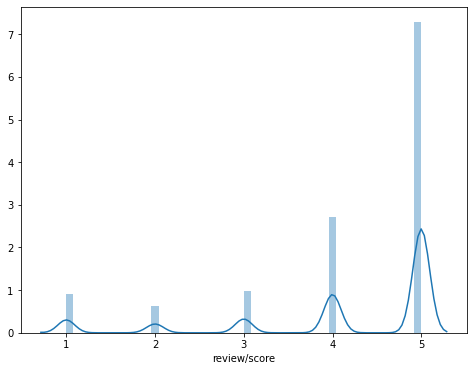

In [66]:
plt.figure(figsize=(8,6))
sns.distplot(t3data['review/score']);

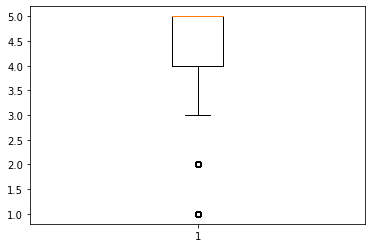

In [67]:
plt.boxplot(t3data['review/score']);

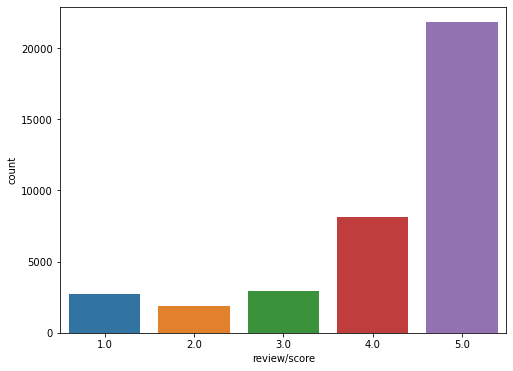

In [68]:
plt.figure(figsize=(8,6))
sns.countplot(t3data['review/score']);

## Cellphone and assesories dataset

In [69]:
d4 = getDF('Cell_Phones_&_Accessories.txt.gz')
d4.head()

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoot...,unknown,A1RXYH9ROBAKEZ,A. Igoe,0/0,1.0,1233360000,Don't buy!,"First of all, the company took my money and se..."
1,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoot...,unknown,A7L6E1KSJTAJ6,Steven Martz,0/0,5.0,1191456000,Mobile Action Bluetooth Mobile Phone Tool Soft...,Great product- tried others and this is a ten ...
2,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoot...,unknown,A2NOQQ7I6PU7CW,"Daniel M. Johnson ""rocknbluesharp""",0/0,4.0,1186704000,good,works real good....a little hard to set up...w...
3,B000924R5I,"USB Data Cable for Sony-Ericsson Z600, Z500, Z...",unknown,A29Q0CLOF0U8BN,E. Owens,4/5,4.0,1146182400,No instructions included...,The price was right for this cable ($11.95+$4....
4,B000924R5I,"USB Data Cable for Sony-Ericsson Z600, Z500, Z...",unknown,ANNHJND2MHUI3,"Isaac Salas ""=CRBF=gB^link""",0/0,1.0,1173657600,NOT A DATA CABLE,this is NOT a DATA CABLE this is only a USB ch...


In [70]:
d4.shape

(78930, 10)

In [71]:
d4.describe()

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
count,78930,78930,78930,78930,78930,78930,78930,78930,78930,78930
unique,7438,7150,944,68041,63370,1305,5,4431,60321,77390
top,B0009B0IX4,Plantronics Voyager 510 Bluetooth Headset [Ret...,unknown,unknown,unknown,0/0,5.0,1168300800,Great Product,I had been very happy with my Motorola phone u...
freq,3443,3443,43287,2276,2276,34920,30253,519,211,20


In [72]:
d4.dtypes

product/productId     object
product/title         object
product/price         object
review/userId         object
review/profileName    object
review/helpfulness    object
review/score          object
review/time           object
review/summary        object
review/text           object
dtype: object

In [73]:
d4.isnull().any()

product/productId     False
product/title         False
product/price         False
review/userId         False
review/profileName    False
review/helpfulness    False
review/score          False
review/time           False
review/summary        False
review/text           False
dtype: bool

In [74]:
d4.isnull().sum()

product/productId     0
product/title         0
product/price         0
review/userId         0
review/profileName    0
review/helpfulness    0
review/score          0
review/time           0
review/summary        0
review/text           0
dtype: int64

In [75]:
d4.drop_duplicates(keep=False,inplace=True)

In [76]:
d4.shape

(78861, 10)

In [77]:
# lets make a copy of the data so that all the transformation is done on the copy and not on the main dataset
t4data=d4.copy()

In [78]:
np.sort(t4data['review/score'].unique())
# ie, The ratings are in range of 1-5

array(['1.0', '2.0', '3.0', '4.0', '5.0'], dtype=object)

In [79]:
t4data=t4data[t4data['product/price'] !='unknown']

In [80]:
t4data['product/price'] = pd.to_numeric(t4data['product/price'])
t4data['product/price'].value_counts()

89.99    3452
29.99    1099
6.99      845
19.99     755
4.51      722
         ... 
26.00       1
1.56        1
14.53       1
21.75       1
5.04        1
Name: product/price, Length: 943, dtype: int64

In [81]:
t4data=t4data[t4data['review/userId'] !='unknown']

In [82]:
t4data['review/userId'].value_counts()

A1RCGK44YXNBBB    28
A4IX5FZOWQVQN     25
A1SFCPHZK18NEH    20
A3ILVGZSKUCC5Z    16
A3JHC8O59WDHFZ    10
                  ..
A3LFO0XEMALECW     1
A3HXJ3FAM3DAM3     1
A1M7LP86HQYTKQ     1
A2Q4O4U90QX6CG     1
A2A9W36JPK9J19     1
Name: review/userId, Length: 33064, dtype: int64

In [83]:
t4data['review/score'] = pd.to_numeric(t4data['review/score'])
t4data['review/score'].value_counts()

5.0    15395
4.0     7319
1.0     6337
3.0     3463
2.0     2825
Name: review/score, dtype: int64

In [84]:
t4data["review/text"] = t4data["review/text"].apply(lambda x:cont_to_exp(x))
t4data["review/summary"] = t4data["review/summary"].apply(lambda x:cont_to_exp(x))
t4data.head()

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
19,B000B6MY2U,Samsung T809 M620 i607 U420 A303 A717 Car Char...,6.75,A1RCOK89DON3YN,L. Henry,1/1,5.0,1212364800,Great Buy!!,I thought this item was great for the money. I...
20,B000B6MY2U,Samsung T809 M620 i607 U420 A303 A717 Car Char...,6.75,A1IDTV3JKFOLVT,"Rex Moncrief ""www.smartergeek.com""",0/0,4.0,1222732800,Charger works great,The charger works fine as advertised. The loca...
30,B00004WINT,Jabra EarGels - Clear,9.70,A29UBSC2VMDUL4,"Jason ""Jason""",9/10,5.0,1213401600,Jawbone Ear Fix,If you have had an issue with the Jawbone head...
31,B00004WINT,Jabra EarGels - Clear,9.70,A7QCUJOH9CIYR,"Dragonspeak ""khsdragon""",6/6,5.0,1187568000,Jabra gels fit well on my aliph jawbone after ...,I accidentally tore the original factory bud o...
32,B00004WINT,Jabra EarGels - Clear,9.70,AX73D8OAWC7TF,"Nathaniel A. McLaughlin ""Blast Pattern""",6/6,4.0,1197504000,Fit is execellent.,Used these to replace the painfuly uncomfortab...


In [85]:
t4data.describe()

,product/price,review/score
count,35339.000000,35339.000000
mean,31.963258,3.639803
std,55.750532,1.528921
min,0.010000,1.000000
25%,4.690000,2.000000
50%,9.700000,4.000000
75%,34.990000,5.000000
max,569.950000,5.000000


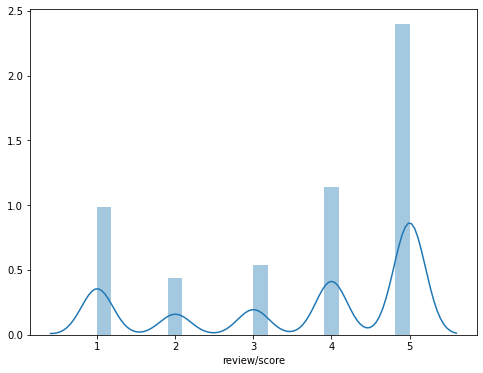

In [86]:
plt.figure(figsize=(8,6))
sns.distplot(t4data['review/score']);

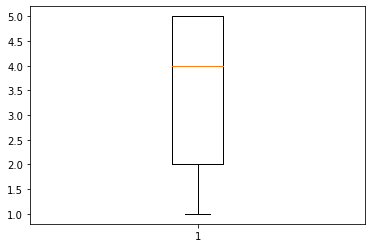

In [87]:
plt.boxplot(t4data['review/score']);

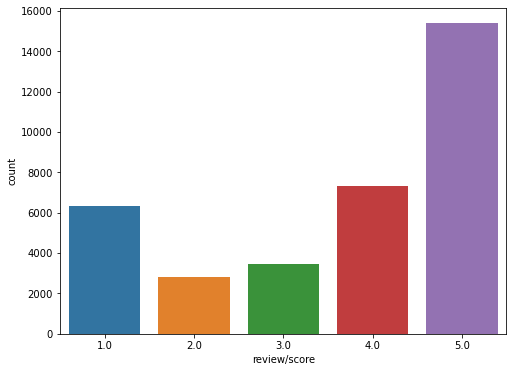

In [88]:
plt.figure(figsize=(8,6))
sns.countplot(t4data['review/score']);

## Sports and Outdoors Dataset

In [89]:
d5 = getDF('Sports_&_Outdoors.txt.gz')
d5.head()

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,B000LCX1FS,SC Sports Green Bay Packers 4 Inch Glass Footb...,unknown,A3S63BBKSZZZQZ,Lwest,0/0,5.0,1309910400,Great gift!,This ornament was ordered as a gift and did no...
1,B000F8L3I0,"NFL Oakland Raiders Cotton Robe (Black, One Size)",80.36,A3UWCRB86NEVOC,jennifer,0/0,4.0,1358640000,Durable,"Very thick and heavy, not fluffy but good for ..."
2,B000F8L3I0,"NFL Oakland Raiders Cotton Robe (Black, One Size)",80.36,A1GJS7NT0KY3PK,Kristina Perez,0/0,5.0,1358121600,My fiance loooooooooooooves his robe,My fiance loooooooooooooves his robe.He hates ...
3,B000F8L3IK,Mcarthur San Diego Chargers Bath Robe,80.36,A2PF4C1R6OALE9,Eric Newhart,0/0,4.0,1358640000,"High quality, but very large.",Definitely not disappointed with the quality o...
4,B0009Q5XOS,"adidas Men's 3-Stripe Fleece Pant,Black/White,...",unknown,A1UIXA657W8LWT,J. Williams,0/0,4.0,1294531200,"comfy,warm.. but run big","just like the title says. Warm, comfy but run ..."


In [90]:
d5.shape

(510991, 10)

In [91]:
d5.describe()

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
count,510991,510991,510991,510991,510991,510991,510991,510991,510991,510991
unique,68293,57048,6842,329232,277949,2662,5,4441,286463,394106
top,B0000U1OCI,Amazon.com: Russell Athletic Men&#39;s Basic C...,unknown,unknown,unknown,0/0,5.0,1168300800,Great product,Purchased to wire up my boat with 12v lights a...
freq,3986,7810,244679,4650,4662,247209,294419,2046,1686,128


In [92]:
d5.dtypes

product/productId     object
product/title         object
product/price         object
review/userId         object
review/profileName    object
review/helpfulness    object
review/score          object
review/time           object
review/summary        object
review/text           object
dtype: object

In [93]:
d5.isnull().any()

product/productId     False
product/title         False
product/price         False
review/userId         False
review/profileName    False
review/helpfulness    False
review/score          False
review/time           False
review/summary        False
review/text           False
dtype: bool

In [94]:
d5.isnull().sum()

product/productId     0
product/title         0
product/price         0
review/userId         0
review/profileName    0
review/helpfulness    0
review/score          0
review/time           0
review/summary        0
review/text           0
dtype: int64

In [95]:
d5.drop_duplicates(keep=False,inplace=True)

In [96]:
d5.shape

(510576, 10)

In [97]:
# lets make a copy of the data so that all the transformation is done on the copy and not on the main dataset
t5data=d5.copy()

In [98]:
np.sort(t5data['review/score'].unique())
# ie, The ratings are in range of 1-5

array(['1.0', '2.0', '3.0', '4.0', '5.0'], dtype=object)

In [99]:
t5data=t5data[t5data['product/price'] !='unknown']

In [100]:
t5data['product/price'] = pd.to_numeric(t5data['product/price'])
t5data['product/price'].value_counts()

22.99     4703
29.99     3272
19.99     2910
24.99     1867
39.99     1832
          ... 
60.39        1
157.65       1
94.39        1
45.32        1
379.99       1
Name: product/price, Length: 6841, dtype: int64

In [101]:
t5data=t5data[t5data['review/userId'] !='unknown']

In [102]:
t5data['review/userId'].value_counts()

A3OXHLG6DIBRW8    99
AVPO2MB6NQVP7     49
A24X31K29QWWF3    47
AJGU56YG8G1DQ     38
A19XC6Z95GK5AB    38
                  ..
A3RYSI7JUHDSMU     1
A24PAC4FQYXS2A     1
A1WS8WICEEV7Y0     1
A3QH24M8LMU0IW     1
AOJBFIAXRSSYA      1
Name: review/userId, Length: 219379, dtype: int64

In [103]:
t5data['review/score'] = pd.to_numeric(t5data['review/score'])
t5data['review/score'].value_counts()

5.0    152833
4.0     53722
1.0     22296
3.0     21293
2.0     13770
Name: review/score, dtype: int64

In [104]:
t5data["review/text"] = t5data["review/text"].apply(lambda x:cont_to_exp(x))
t5data["review/summary"] = t5data["review/summary"].apply(lambda x:cont_to_exp(x))
t5data.head()

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
1,B000F8L3I0,"NFL Oakland Raiders Cotton Robe (Black, One Size)",80.36,A3UWCRB86NEVOC,jennifer,0/0,4.0,1358640000,Durable,"Very thick and heavy, not fluffy but good for ..."
2,B000F8L3I0,"NFL Oakland Raiders Cotton Robe (Black, One Size)",80.36,A1GJS7NT0KY3PK,Kristina Perez,0/0,5.0,1358121600,My fiance loooooooooooooves his robe,My fiance loooooooooooooves his robe.He hates ...
3,B000F8L3IK,Mcarthur San Diego Chargers Bath Robe,80.36,A2PF4C1R6OALE9,Eric Newhart,0/0,4.0,1358640000,"High quality, but very large.",Definitely not disappointed with the quality o...
33,B000BNMXJM,"St. Croix Premier Spinning Rod 6'6"",Medium Fas...",110.00,A3643M9OAWLG8U,Philip J. Whaley,0/0,5.0,1351123200,St. Croix fishing pole,"This is my favorite pole for fluke fishing, it..."
34,B00015QNZ0,"National Football League Team Pennants... 12"" ...",98.95,AM9QW0954V4ZV,Ms Chat,0/0,5.0,1361145600,Love it,This collection set my game room off. I love t...


In [105]:
t5data.describe()

,product/price,review/score
count,263914.000000,263914.000000
mean,54.322838,4.140622
std,82.927195,1.268486
min,0.010000,1.000000
25%,14.950000,4.000000
50%,27.890000,5.000000
75%,58.950000,5.000000
max,999.000000,5.000000


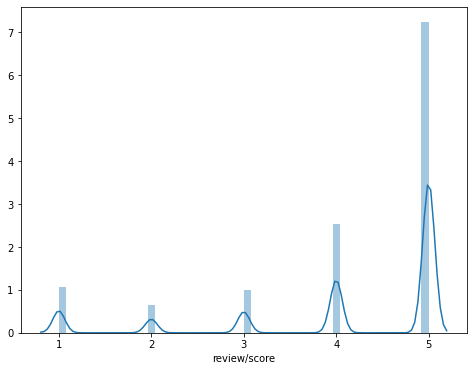

In [106]:
plt.figure(figsize=(8,6))
sns.distplot(t5data['review/score']);

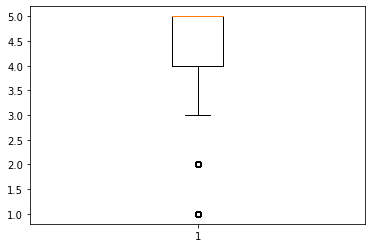

In [107]:
plt.boxplot(t5data['review/score']);

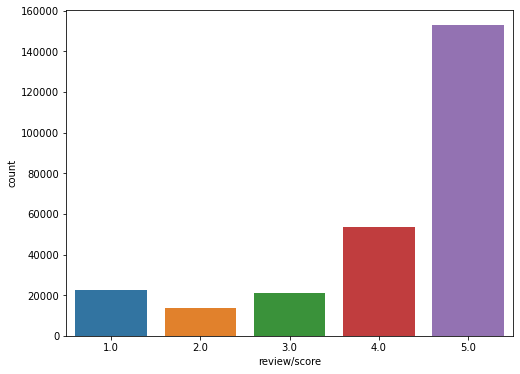

In [108]:
plt.figure(figsize=(8,6))
sns.countplot(t5data['review/score']);

### Combining the Datasets By outer join so all the rows are included

In [109]:
df1 = pd.merge(t1data,t2data, how = 'outer')
df2 = pd.merge(df1,t3data, how = 'outer')
df3 = pd.merge(df2,t4data, how = 'outer')
df4 = pd.merge(df3,t5data, how = 'outer')
df4.shape

(921631, 10)

In [110]:
df4.head()

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,B000P9JTW6,Gomadic Compact Retractable USB Charge and Dat...,17.69,A2T7YFEAI0X74W,Thomas O. Fort,0/0,4.0,1245974400,nifty,It is very convenient to have the charging cab...
1,B0000DFZ2U,APC P1T 120V Portable Surge Protector,13.89,A1Y8DLP78Z778V,Michael,1/1,5.0,1287273600,APC P1T 120V Portable Surge Protector,Perfect carry-along for my notebook PC. Useful...
2,B0000DFZ2U,APC P1T 120V Portable Surge Protector,13.89,AAF3I3SZ6CXGY,"Ross Knight ""Subvet""",0/0,5.0,1360108800,Insurance policy!,This protector is an excellent value. Rated ve...
3,B0000DFZ2U,APC P1T 120V Portable Surge Protector,13.89,ARA1MZKJQLXGE,Kevin,0/0,5.0,1359244800,Works great for appliances,I bought one of these to protect my washing ma...
4,B0000DFZ2U,APC P1T 120V Portable Surge Protector,13.89,A2P9Q94AA63517,Bruce E Harrison,0/0,5.0,1355270400,Single Surge Protector,Just right for travel for my computer and it i...


In [111]:
names={'product/productId' : 'ProductID', 'product/title':'Title','product/price':'Price','review/userId':'userId','review/profileName':'ProfileName','review/helpfulness':'Helpfulness','review/score':'Rating','review/time':'TimeStamp','review/summary': 'Summary','review/text':'Text'}
df5 = df4.rename(names, axis = 1)

In [112]:
df5.head()

,ProductID,Title,Price,userId,ProfileName,Helpfulness,Rating,TimeStamp,Summary,Text
0,B000P9JTW6,Gomadic Compact Retractable USB Charge and Dat...,17.69,A2T7YFEAI0X74W,Thomas O. Fort,0/0,4.0,1245974400,nifty,It is very convenient to have the charging cab...
1,B0000DFZ2U,APC P1T 120V Portable Surge Protector,13.89,A1Y8DLP78Z778V,Michael,1/1,5.0,1287273600,APC P1T 120V Portable Surge Protector,Perfect carry-along for my notebook PC. Useful...
2,B0000DFZ2U,APC P1T 120V Portable Surge Protector,13.89,AAF3I3SZ6CXGY,"Ross Knight ""Subvet""",0/0,5.0,1360108800,Insurance policy!,This protector is an excellent value. Rated ve...
3,B0000DFZ2U,APC P1T 120V Portable Surge Protector,13.89,ARA1MZKJQLXGE,Kevin,0/0,5.0,1359244800,Works great for appliances,I bought one of these to protect my washing ma...
4,B0000DFZ2U,APC P1T 120V Portable Surge Protector,13.89,A2P9Q94AA63517,Bruce E Harrison,0/0,5.0,1355270400,Single Surge Protector,Just right for travel for my computer and it i...


In [113]:
df5.describe()

,Price,Rating
count,921631.000000,921631.000000
mean,60.988039,4.035949
std,103.260650,1.364192
min,0.010000,1.000000
25%,12.030000,4.000000
50%,26.990000,5.000000
75%,62.240000,5.000000
max,999.990000,5.000000


In [114]:
# Dropping the timestamp column
df5.drop(['TimeStamp'], axis=1,inplace=True)

## Take a subset of the dataset to make it less dense. 
### ie, keep the users only who has given 30 or more number of ratings

In [115]:
df6 = df5.groupby(by='userId')['Rating'].count().sort_values(ascending=False)
print('\n No of rated product more than 30 per user : {}\n'.format(sum(df6 >= 40)) )


 No of rated product more than 30 per user : 108



In [116]:
df7=df5.copy()
df7 = df7[df7.groupby('userId')['userId'].transform('size') > 40]
df7=pd.DataFrame(df7)
df7=df7.reset_index(drop=True)

In [117]:
df7.shape

(5288, 9)

In [118]:
df7.dtypes

ProductID       object
Title           object
Price          float64
userId          object
ProfileName     object
Helpfulness     object
Rating         float64
Summary         object
Text            object
dtype: object

In [119]:
#Getting the new dataframe which contains users who has given 50 or more ratings

new_df=df5.groupby("ProductID").filter(lambda x:x['Rating'].count() >=50)

In [120]:
new_df.head()

,ProductID,Title,Price,userId,ProfileName,Helpfulness,Rating,Summary,Text
20,B0001YXWVO,Macally PS-AC4 AC Power Adapter for Apple G4,30.24,ADO14028VU09Z,Roger H. Howe,0/0,5.0,Just what we needed to keep on truckin,Does just what was needed to charge the Macboo...
21,B0001YXWVO,Macally PS-AC4 AC Power Adapter for Apple G4,30.24,A1EH2RJLT83NHB,Picky Shopper,0/0,5.0,"Works well so far, fast delivery.",Received it a couple days after ordering (I li...
22,B0001YXWVO,Macally PS-AC4 AC Power Adapter for Apple G4,30.24,AUZBHPYJPE4FF,"GoGreen07 ""Spartan""",0/0,5.0,Great Alternative to Apple Power Adapter.,This product works well. I got it for my iBook...
23,B0001YXWVO,Macally PS-AC4 AC Power Adapter for Apple G4,30.24,A1DFTB50QWXC63,M. Nason,0/0,4.0,Without Question.....,This power adapter is exceptional compared to ...
24,B0001YXWVO,Macally PS-AC4 AC Power Adapter for Apple G4,30.24,ADY52SHWSCRP1,Tyler Lawrence,0/0,4.0,tougher and cheaper than Apple's,This is the best replacement power supply I ha...


In [121]:
new_df.shape

(575313, 9)

# Model-based collaborative filtering system

These methods are based on machine learning and data mining techniques. The goal is to train models to be able to make predictions. For example, we could use existing user-item interactions to train a model to predict the top-5 items that a user might like the most. One advantage of these methods is that they are able to recommend a larger number of items to a larger number of users, compared to other methods like memory based approach. They have large coverage, even when working with large sparse matrices.

In [122]:
new_df1=new_df.head(30000)
new_df1.shape

(30000, 9)

In [123]:
ratings_matrix = new_df1.pivot_table(values='Rating', index='userId', columns='ProductID', fill_value=0)
ratings_matrix.head()

ProductID,B00004SGD3,B00004TBLW,B00004TVSP,B000058BCQ,B000058BCR,B00005AWBJ,B00005AWCL,B00005KB37,B00005N5WW,B00005N5X2,...,B000P0NJPS,B000P41QJ0,B000P6U6IU,B000PELLGS,B000PMGZDO,B000Q6LZLG,B000Q9DX0O,B000QAVVAM,B000RGZMYQ,B000SQ93Z4
userId,,,,,,,,,,,,,,,,,,,,,
A00279861HQYOQ4LIJ55F,0.0,0,0,0.0,0,0,0.0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
A00721892PFQPJ3J3IHGN,0.0,0,0,0.0,0,0,0.0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
A01262391CVDKK68IDCWS,0.0,0,0,0.0,0,0,0.0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
A055760637EV7Z72T33OR,0.0,0,0,0.0,0,0,0.0,0,5,0,...,0,0.0,0,0,0,0,0,0,0,0
A07947781AC8SMD0DJMS3,0.0,0,0,0.0,0,0,0.0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0


In [124]:
ratings_matrix.shape

(27469, 142)

In [125]:
# Transposing the matrix
X = ratings_matrix.T
X.head()

userId,A00279861HQYOQ4LIJ55F,A00721892PFQPJ3J3IHGN,A01262391CVDKK68IDCWS,A055760637EV7Z72T33OR,A07947781AC8SMD0DJMS3,A0937098JH9O5KDV5H5F,A09600262CLBSRBGU2VTY,A100CAASMNGWJM,A100I4UAHGQCF6,A100XVWWRHLJNQ,...,AZY5X93OVEWO7,AZYCISZV6XWE4,AZYF55JCUQVNJ,AZYJE40XW6MFG,AZYPESB48J1FF,AZYVVNVT5UCMP,AZYVY3MRFY2ZU,AZZ3QEYYE9H6C,AZZOG1AHTORRC,AZZRXD27FMRE4
ProductID,,,,,,,,,,,,,,,,,,,,,
B00004SGD3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00004TBLW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00004TVSP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000058BCQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000058BCR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
X.shape

(142, 27469)

In [127]:
X1 = X

### Decomposing the matrix

In [128]:
from sklearn.decomposition import TruncatedSVD
import joblib
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(142, 10)

In [129]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(142, 142)

In [130]:
X.index[75]

'B0006NL5SM'

In [131]:
#i = "B0006NL5SM"

#product_names = list(X.index)
#product_ID = product_names.index(i)
#product_ID

#### Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [132]:
#correlation_product_ID = correlation_matrix[product_ID]
#correlation_product_ID.shape

### Recommending top 25 highly correlated products in sequence

In [133]:
#Recommend = list(X.index[correlation_product_ID > 0.65])

# Removes the item already bought by the customer
#Recommend.remove(i) 

#Recommend[0:24]

### top 10 products to be displayed by the recommendation system to the above customer based on the purchase history of other customers in the website.

In [134]:
new_df['Title'].loc[new_df['ProductID'] == 'B0006NL5SM'].iloc[0]

'Beyerdynamic DT 770 PRO, 250 ohms'

In [135]:
X.index[60]

'B0002JFN38'

## The function result() takes productID and returns the top 10 recommendations

In [136]:
def result(i):
    Product_names = list(X.index)
    product_ID = Product_names.index(i)
    correlation_product_ID = correlation_matrix[product_ID]
    Recommend = list(X.index[correlation_product_ID > 0.65])
    Recommend.remove(i) 
    for j in Recommend[0:15]:
        print(new_df['Title'].loc[new_df['ProductID'] == j].iloc[0])

In [137]:
result('B00065ANY2')

Belkin MasterCube 1 Outlet Wall-Mount Surge Protector
D-Link DWL-G520 Wireless PCI Adapter, 802.11g, 108Mbps
NETGEAR WG111 Wireless USB 2.0 Adapter (54 Mbps)
C2G / Cables to Go 27139 Cat6 Snagless Patch Cable, Grey (150 Feet/45.72 Meters)
C2G / Cables to Go 27148 Cat6 Snagless Patch Cable, Blue (125 Feet/38.1 Meters)
C2G / Cables to Go 27149 Cat6 Snagless Patch Cable, Blue (150 Feet/45.72 Meters)
C2G / Cables to Go 27158 Cat6 Snagless Patch Cable, Black (125 Feet/38.1 Meters)
C2G / Cables to Go 27178 Cat6 Snagless Patch Cable, Green (125 Feet/38.1 Meters)
Tripp Lite HT10DBS Home Theater Isobar Surge Protector 10 Outlet RJ11 RJ45 Coax
Canon CB-2LX Battery Charger for Canon NB-5L Li-Ion Batteries
6ft Toslink to Mini Toslink Cable
Nikon EN-EL10 Lithium-ion Battery for Nikon Coolpix S80, S5100, S4000, S3000, S600, S570, S520 & S210 Digital Cameras - Retail Packaging
Polk Audio DB651s Slim-Mount 6.5-Inch Coaxial Speakers (Pair)
iLuv i707BLK Automobile FM Transmitter for your iPhone or iPod 

## Saving the model files

def save_as_pickle(obj, root_dir, obj_name):
    """
    Saves file locally
    """
    obj_path = obj_name + '.pkl'
    joblib.dump(obj, root_dir + obj_name + '.pkl')
    return obj_path

save_as_pickle(result, '', 'result')